##### Checking and Preprocessing testing data

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from multiprocessing import Pool
import string
import re

In [3]:
## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
raw_test = pd.read_csv('../data/test.csv')
new_test = pd.read_csv('../data/new_test.csv')

In [6]:
perm = np.random.permutation(len(raw_test))
test_idx = perm[:20]
test_df = pd.DataFrame({
    'raw': raw_test.comment_text.values[test_idx],
    'new': new_test.comment_text.values[test_idx],
})
display(test_df)

,new,raw
0,doncram i don t know if you think you re some...,"""Doncram: I don't know if you think you're som..."
1,a barnstar for you style background color fdf...,""" \n\n == A barnstar for you! == \n\n {| style..."
2,structured false flag hi arthur warrington th...,"== Structured false flag == \n\n Hi, Arthur Wa..."
3,thank you for this rich i hope he or she reads...,"Thank you for this, Rich. I hope he or she rea..."
4,get that don t be a dick stuff off your page ...,""" \n\n \n Get that don't be a dick stuff off ..."
5,apologies on opening the flood gates and posti...,Apologies on opening the flood gates and posti...
6,8 december 2005 this message is regarding the...,== 8 December 2005 == \n\n This message is reg...
7,utc katherine mcphee has two or multiple top ...,(UTC) \n\n :Katherine McPhee has two or multip...
8,i f stone could you please explain at talk i ...,== I.F. Stone == \n\n Could you please explain...
9,i don t have a problem with it nor have i che...,"""I don't have a problem with it, nor have I ch..."


In [7]:
ref = set("qwertyuiopasdfghjklzxcvbnm1234567890 ")
def getRatio(s):
    n_numalpha = np.array([s.count(c) for c in ref]).sum()
    return 1.*n_numalpha / len(s)
print getRatio("then how am i supposed to communicate")

1.0


CPU times: user 679 ms, sys: 645 ms, total: 1.32 s
Wall time: 2.9 s


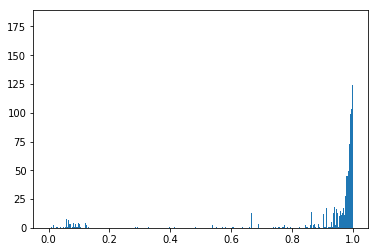

In [9]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, new_test.comment_text.str.lower())
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
pool.close()
pool.join()

In [11]:
cnt = 0
for i,r in enumerate(Eng_ratio):
    if r <= 0.85:
        cnt += 1
        print i, r
        print "$$$$$$$$$$$$$$: ", new_test.comment_text.values[i]
print cnt

 34 0.0526315789474
$$$$$$$$$$$$$$:  일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허
62 0.820933165195
$$$$$$$$$$$$$$:   there are now four references including britannica giving the correct date which is getting silly you complain in your edit summary that you can t find them so i ve added quotes to two to help you out after that you re on your own wp sourceaccess has more on this i m happy to concede that britannica alone mentions the date you offer but without explaining the context so that s one of the sources i ve expanded with a quote specifically mentioning 23 august russian wikipedia has 23 августа силы 14 го танкового корпуса армии паулюса вышли к волге севернее сталинграда august 23 forces of the 14th tank corps army of paulus reached the volga north of stalingrad cited from the war diary of colonel general franz haider 
114 0.0581778265642
$$$$$$$$$$$$$$:  পরিচয় নাম মোঃফরহাদ ইসলাম পিতা মোঃ শাহজাহান মিয়া মাতা মোছাঃফাহিমা বেগম গ্রামঃ জানকিপুর সলই মন্ডল পাড়া ইউনিয়নঃনিলাখিয়া উপজেলাঃবকশীগঞ্জ জ

$$$$$$$$$$$$$$:   béla kun thanks for cleaning up and englishifiing ♥♥♥ ✍ 
9305 0.633410672854
$$$$$$$$$$$$$$:   guys aren t you all tired of parroting the term hunta you look really stupid doing this try to diversify you lexicon a bit and it s spelled as junta btw nothing personal just noting the first hand demonstration of the power of russian brainwashing machine ехал хунта через хунта видит хунта хунта хунта хунта хунта хунта хунта хунта хунта хунта хунта 
9570 0.648393194707
$$$$$$$$$$$$$$:   kang s official management entlian corp announced it via press release in korean entlian said kang left pride fc and confirmed transper to k 1 hero s he will fight against kazushi sakuraba at yokohama on 17 september 2007 데니스 강이 그동안 활동했던 프라이드fc를 떠나 k 1 히어로즈로 이적이 확정됐다 9월17일 일본 요코하마에서 열릴 k 1 대회에 출전 사쿠라바 가즈시 38 일본 와 맞붙는다 reference spiritmc news release korean but still k 1 official announce is not exist 
9586 0.297872340426
$$$$$$$$$$$$$$:  ┌────┬┄┄┄┄┐ bob paul mary
9827 0.14371257485
$$$$$$$$$$

17788 0.01375
$$$$$$$$$$$$$$:  ฝ่ายบริการฝึกอบรม ฝ่ายบริการฝึกอบรม ส่วนธรรมนิเทศ สำนักส่งเสริมพระพุทธสาสนาและบริการสังคม เป็นหน่วยงานของมหาวิทยาลัยที่มีหน้าที่ให้บริการวิชาการด้านพระพุทธศาสนา จัดอบรมเด็กและเยาวชนค่ายคุณธรรมเป็นไปตามหลักสูตรสาระการเรียนรู้พระพุทธศาสนาในปัจจุบัน โรงเรียนวิถีพุทธ พัฒนาครูและบุคลากรทางการศึกษา และให้การอบรมคุณธรรมและจริยธรรมแก่หน่วยงานราชการและประชาชนทั่วไปที่มาขอรับการบริการด้านการฝึกอบรมด้านพระพุทธศาสนา ๒ ปรัชญาแทรกข้อความที่ไม่จัดรูปแบบที่นี่ ทนฺโต เสฏฺโฐ มนุสฺเสสุ ในบรรดามนุษย์ทั้งหลาย ผู้ที่ฝึกแล้วประเสริฐที่สุด ๓ วิสัยทัศน์ นำหลักธรรมของพระพุทธศาสนาออกเผยแผ่ให้สังคมไทยได้มีแสง สว่างแห่งพระธรรมนำทางการดำเนินชีวิต สอดคล้องยุทธศาสตร์การพัฒนาประเทศชาติ ให้สมกับปรัชญาของมหาวิทยาลัยมหาจุฬาลงกรณราชวิทยาลัยว่า ปญญา โลกสฺมิ ปชฺโชโต ปัญญาเป็นแสงสว่างในโลก ๔ พันธกิจ ๑ ให้การบริการฝึกอบรมคุณธรรม จริยธรรม แก่เด็ก เยาวชน ข้าราชการและประชาชนทั่วไป ๒ ส่งเสริมสนับสนุนการปฏิบัติธรรมตามนโนบายของรัฐ คณะสงฆ์ สถานศึกษา และภาคเอกชน ๓ ให้คำแนะนำและบริการวิชาการส่งเสริมพระพุ

29960 0.285714285714
$$$$$$$$$$$$$$:  ĥǒŵ ťő màkê șïlïcon àț ĥõmĕ
30071 0.077519379845
$$$$$$$$$$$$$$:   والله عنما يقول وَمَن لَّمْ يَسْتَطِعْ مِنكُمْ طَوْلاً أَن يَنكِحَ الْمُحْصَنَاتِ الْمُؤْمِنَاتِ فَمِن مَّا مَلَكَتْ أَيْمَانُكُم مِّن فَتَيَاتِكُمُ الْمُؤْمِنَاتِ فانه يصف ملك اليمين بأنها فتاة و مؤمنة وليست اسيرة ومشركة كما تقولين فالأرجح أن تكون ملك اليمين هى الفتاة العذراء
30296 0.0721649484536
$$$$$$$$$$$$$$:   शिवेति मंत्र भूषण जग्गत जयाय जायतां 
30307 0.722222222222
$$$$$$$$$$$$$$:   time sharing chia phiên sử dụng của các máy tính trong cùng một thời gian 
30311 0.116666666667
$$$$$$$$$$$$$$:  على تبن لو مو عاجبك الحال قدامك 6 جدار بالغصب راح اخليك تقبل تعديلي
30353 0.0545182972367
$$$$$$$$$$$$$$:   আমন্ত্রণ প্রিয় হোসেন বিরক্ত করার জন্য প্রথমেই দুঃখিত। আপনাকে বাংলা উইকিপিডিয়াতে সম্পাদনা করতে নিবন্ধ তৈরি করতে আমন্ত্রণ জানাচ্ছি। আপনি ইংরেজি উইকিতে বাংলাদেশের বিষয়ের পাশাপাশি অন্য দেশের বিষয়ে সম্পর্কিত বিষয় লিখছেন অথচ বাংলা উইকিতে কোন কিছু করছেন না দেখে খারাপ লাগলো। আমাদের 

$$$$$$$$$$$$$$:   سحقا لك ولكل المسيحيين السفلة سحقا لك ولكل المسيحيين السفلة
38063 0.0810810810811
$$$$$$$$$$$$$$:  μεγάλο πέος επιτήθετε στο χωριό βοηθεια 
38167 0.821428571429
$$$$$$$$$$$$$$:   now e mailed — rhaworth 
38302 0.0784982935154
$$$$$$$$$$$$$$:  ﻣﺤﻤﺪ ﻣﺼﻄﻔﯽ ﺻﮧ ﮐﮭﺎﻧﮯ ﮐﺎ ﮔﺮﺍ ﮨﻮﺍ ﭨﮑﮍﺍ ﺩﺳﺘﺮﺧﻮﺍﻥ ﺳﮯ ﺍﭨﮭﺎ ﮐﺮ ﮐﮭﺎﻧﺎ ﺍﻭﻻﺩ ﻣﯿﮟ ﺧﻮﺑﺼﻮﺭﺗﯽ ﺭﺯﻕ ﻣﯿﮟ ﺑﺮﮐﺖ ﺍﻭﺭ ﺗﮑﺒﺮ ﺧﺘﻢ ﮐﺮﺗﺎ ﮨﮯ
38314 0.0827067669173
$$$$$$$$$$$$$$:   λυδοί πονηροί αιγύπτιοι δε δεύτεροι τρίτοι δε πάντων κάρες εξωλέστατοι 
38317 0.776119402985
$$$$$$$$$$$$$$:   for others information this is the article here 武汉3d培训班 
38330 0.81686746988
$$$$$$$$$$$$$$:   text to translate historic coffehouses „most kávé kellene pillés és enyhe kávé ” a falusias utcácskákban immár emeletes házak épültek s a környék vendéglátóhelyeinek száma a századfordulóra mai szemmel hihetetlen mértékben megnõtt hirdetéseik szerint kb 1890 és 1910 között vagyis a philadelphia születésének és felfutásának idején csak a legszûkebb városközpontban a következõ n

45272 0.85
$$$$$$$$$$$$$$:   you re welcome — 
45442 0.00698324022346
$$$$$$$$$$$$$$:  จากทนายมาขายสังฆภัณฑ์ เริ่มต้นจากการที่ผู้ผลิตชอบไปทำบุญอยู่เรื่อยๆ ทั้งที่วัดใกล้บ้านและวัดที่เป็นเส้นทางผ่านเวลาต้องไปว่าความที่ต่างจังหวัด ก็ทำให้พบว่าสังฆภัณฑ์ที่มีผู้นำไปถวายพระทั้งของบริโภคและอุปโภคนั้นมักจะซ้ำๆ กัน ทำให้พระที่ได้รับไปใช้ไม่ทันก็เกิดความคิดอยากจะเปิดร้านสังฆภัณฑ์จำหน่ายของใช้สำหรับพระภิกษุหรือสามเณร ที่แตกต่างจากที่มีอยู่ตามท้องตลาดทั่วไป เมื่อคิดอยู่ได้ไม่นานก็ได้พบกับ รุ่นพี่ผู้หญิงท่านหนึ่งซึ่งเป็นผู้ที่ชอบทำบุญอยู่เป็นประจำได้ให้คำแนะนำว่าของใช้ที่พระภิกษุสามารถใช้ได้นั้นมีทั้ง ซองใส่ช้อนส้อม ซองใส่แว่นตาผ้ารับประเคน และอีกหลายอย่างเมื่อได้รับคำแนะนำดังนั้นสังฆภัณฑ์รูปแบบใหม่ ภายใต้แบรนด์ สายธารบุญ จึงได้เป็นรูปเป็นร่างขึ้นเหตุที่ใช้ชื่อสังฆภัณฑ์รูปแบบใหม่นี้ว่า สายธารบุญ เนื่องมากจากผู้ผลิตมีความคิดว่าสายน้ำเป็นสัญลักษณ์แห่งความชุ่มเย็นให้ประโยชน์กับคนได้ไม่เลือกชนชั้นเปรียบเหมือนกับผลของบุญกุศลที่ให้ผลกับผู้สร้างโดยไม่เลือกว่าผู้นั้น จะเป็นใคร อีกทั้งสายน้ำนั้นเมื่อไหลผ่า

56586 0.0438388625592
$$$$$$$$$$$$$$:  დიახ შემიძლია რამდენიმე სტატია სპარსულ ვიკიპედიაში დამიწერია საქართველოს სტატია სპარსულ ვიკიპედიაში მთელად ჩემი საქმეა ასევე ქართველები ირანის ქართველები ალავერდი ხანი იმამყული ხანი ქართული დამწერლობა ქართული ენა ქართული ლიტერატურა ქართული კულტურა ქართული მართლმადიდებლური ეკლესია ქართული მუსიკა ქართული ხელოვნება სპორტი საქართველოში კინო საკართველოში ქართლის დედა ქართლი ფერეიდანი ფერეიდუნშაჰრი ბუინ ვა მიანდაშთ დაშქესანი და სრულად წიგნებიდან ვიკიპედიაში დამიწერია და ინგლისურიდან თარგმნული მხოლოდ გრემი ვარძია და უფლისციხე მიმაჩემის ბიძისგოგო ჩემი პაპის ძმისშვილი გადათარგმნა და მე დავწერე სპარსულ ვიკიპედიაში 
56604 0.0748576078112
$$$$$$$$$$$$$$:   слова поддержки уважаемый алексей николаевич наблюдая за развёртыванием конфликта в который вы оказались вовлечены в русской википедии я подумал что было бы полезно поделиться с вами моим опытом в моём иске вп 631 я приводил огромное количество источников чтобы доказать что претензии сформулированные в итог

65529 0.0919400567031
$$$$$$$$$$$$$$:  الادارة الاكرانية الموقرة تابعت عن اخبار العلاقات الاكرانية الروسية بموسكو وهذا خبر فى غاية الاهمية من حيثيات وضع خطوط عريضة مشتركة تعزز وشع البلدين المشتركين فى وطن كبير اسمه الاتحاد السوفيتى العظيم وعن ذلك اريد ان اشار برأيى فى هذه العلاقة القوية التى يجب ان تكون وطيدة من جميع الحيثيات المتعلقة بالاستراتيجية العسكرية والثقافية والاقتصادية للبلدين بمحتوى دول الاتحاد وحتى لا يكون هناك هى فجوات متسللا اليها العدو من قبل يجب وضع سياسة تستوعب كيفيات التعامل فى القضايا الشائكة بالحكمة المطلوبة وان عودة الاتحاد هو التآم لجسدا واحدا باصابع يد مختلفة وان كلا للاخر جزء لا يتجزء من الوطن الكبير بسياسة حكيمة وقوية تقوم على اسسها موسكو واكرانيا لاصلاح الشأن العام من ناحية عدم الانخراط او التبعية لاى سياسة امريكية او اوروبية وان الاتحاد الروسى سيكون فى غنى تام عن اى وضع يجعل دول الاتحاد ملحق بحلف الناتو او غيره لان ذلك سيضعف من شئن انفراد الاتحاد كقوة عظمى كبيرة وان انفرادية الاتحاد الروسى بتاسيس حلف بلاده سيعزز من هذه القوة فى جميع الاوضاع السياسة ويجعل لها 

$$$$$$$$$$$$$$:  toyoshima 豊島 与志雄 上海の渋面 play books page unspecified 
75457 0.113924050633
$$$$$$$$$$$$$$:  در ویکیپیدا منابع باید معتبر باشند به دلخواه امنیت که نیست به نظر میرسد که خود شما قومگرای پان ترک باشید و با منابع موثق مشکل دارید 
75525 0.0847457627119
$$$$$$$$$$$$$$:  فاشىنيبل تو ريد مي لول شكراااااا
75593 0.0985915492958
$$$$$$$$$$$$$$:   덧붙여 편집 요약에서 계속 다른 사용자들에게 편집 분쟁을 중지해 달라고 하시는데 가람님 역시 편집 분쟁을 일으키고 있음을 유념해 주시면 감사하겠습니다 
75594 0.846153846154
$$$$$$$$$$$$$$:   decline see wp ebur    
75820 0.0544642857143
$$$$$$$$$$$$$$:   შენ აირჩიე მსგავსი ურთიერთობა პირადად ჩემთან პირველად თბილისის ცვლილებებზე ვნახე შენი მოქმედებები და ასე თუ ისე დაგეთანხმე და მეგონა ნორმალურად და დაბალანსებულად გააგრძელებდი მუშაობას მაგრამ აბსოლუტურად არათანამშრომლობის გზას დაადექი და პირადად ჩემთან დაიწყე ბრძოლა კომონსზე ვაჟა ფშაველას ორიგინალ სურათზე მებრძვი ფიროსმანის სურათზეც წერა კითხვის გამავრცელებელ საზოგადოებაზეც და ა შ ეს ნამდვილად არ ჯდება ჯოჯოებთან ბრძოლაში როგორც შენ აღწერ ჯოჯოებს კი არა თუ ქ

$$$$$$$$$$$$$$:   yana yany هو موقع يقدم خدمات الشبكات الاجتماعية على الويب تقدم شبكة تفاعلية بين الأصدقاء المسجلين في الخدمة بالإضافة إلى خدمات أخرى كالمدونات ونشر الصور والموسيقى ومقاطع الفيديو والمجموعات البريدية وملفات المواصفات الشخصية للأعضاء
85413 0.00682593856655
$$$$$$$$$$$$$$:   福建省旗 您好！我看到您在中文維基百科的福建省加上了它的旗幟。請問這面旗的檔案是您上傳的嗎？我對旗幟很有興趣，但從未看過這面旗，很好奇請問您是如何得知這面旗的呢？請在我的中文維基討論頁留言，謝謝。
85732 0.092807424594
$$$$$$$$$$$$$$:   бобанизам бобанизам е религија во која веруваат голем дел од населението на јужниот и северниот пол бобанизамот е религија во која е верува дека цовекот настанал од бобанизи кој се доелие на земјата од марс или друга планети на земјата поради подобри услови за преживување како минувале годините така се менувал ликот на луѓето кога се доселиле вонемјаните на земјата биле мнобу ниски и мали тие почнале да играат кошарка и се извишиле и така го добиле сегашниот изглед 
85961 0.85
$$$$$$$$$$$$$$:  merge completed — 
85998 0.661971830986
$$$$$$$$$$$$$$:   at have you boo

96373 0.124028931155
$$$$$$$$$$$$$$:   سلام خدا بر مجاهدان راه حق؛ سلام خدا بر شهیدان ای کسانی که دم از ولایت می زنید و خود را ولایی می دانید ای آنانی که چشمتان به نگاه امیرتان است ، گناه اراده انسان را در راه حسینی شدن سست می کند، گناهکار همانطور که از خدای تعالی جداست از اولیای او نیز جداست ان الله یعلم السر و اخفی این دهان توست که می گوید اگر آقا بگوید برو می روم، اما هیچ با خود اندیشیده ای که دل باید در گرو او باشد، دلت باید مجذوب او باشد و قلبی که دوده گناه بر در و دیوار آن نشسته باشد هیچگاه نور زهرایی ولی را منعکس نمی کند و همیشه بی نور و دور خواهد ماند همیشه با خود می گفتم کاش من هم از آنهایی بودم که آقا به آنها توجه و عنایت خاص دارند، آنهایی که باری از اندوه دل او برمی دارند، اما میدانم که این شدنی است باید برای خشنودی رب العالمین برخواست و پا در مسیر ولایت نهاد و چشم از نامحرم پوشاند وبدانید که هیچ سعادتی از لبخند او به شما شیرین تر نیست اما اینکه خود را سرباز صفر خواندم چون من و دوستانم هرگز ادعای نخبه فکری بودن را نداریم مدعی بودن بود در دین عاشق اتهام و تنها از جان ودل خواس

107992 0.58071278826
$$$$$$$$$$$$$$:   نگاهی هم به اول صفحه کاربر بیندازید ببینید در حقش چه نوشته اند ظاهرا خودش مشهور به وندالیزم است آنوقت درخواست بستن مرا داده most of your edits appear to be reverting a single user and you haven t justified a single one of these reverts this behavior is stalking and possibly vandalism do not continue to remove information without giving an edit summary or you may be blocked 
108128 0.0887573964497
$$$$$$$$$$$$$$:  διαπορεί το τσόλι σκέφτηκα να ρωτήσω πού είναι παραχωμένα τα σόγια του για να αφοδεύσω στα κιβούρια τους αλλά μετά συνειδητοποίησα ότι εκεί δεν τους θάβουν τους ταΐζουν στα κοπρόσκυλα 
108184 0.0812917594655
$$$$$$$$$$$$$$:  उदशाह मेरा गाँव है इसके पास में १० किलो मीटर पर सफीपुर सहर है मेरे गाँव का प्रधान और रोजगार बहुत ही भ्रष्ट हैं दोनों के खिलाफ लगभग ५० शिकायतें है मेरे गाँव में नरेगा के अंतर्गत काम न करवाके सरे रूपये ग्राम प्रधान और बी डी ओ और रोजगार सेवक सभी मिलकर डकार जाते हैं गाँव में आज भी काम नहीं होते है रूपये निकाल कर सभी अधिका

118296 0.142857142857
$$$$$$$$$$$$$$:   kate counter problem see my talk please 카테 카운터를 쓰는데요 전 영어위키와 한글위키 아이디가 같구요 그런데 영어위키에 대한 카운터는 제대로 작동하더군요 실시간으로 바로바로 카운터가 작동되던데 한글위키에는 아직도 제 아이디가 카운트 안됩니다 다른 운영자 아이디 넣어도 안나와요 그래서 한글위키 운영자에게 물어보니까 플로리다에서 한국으로 서버를 이전했는데 그 부분을 카테가 반영하지 않아서 에러가 나는게 아니겠냐고 하더군요 카테 오류좀 고쳐주었으면 합니다 
118322 0.492307692308
$$$$$$$$$$$$$$:   this page archive mentions an アーバイン土曜日補習校 
118471 0.826923076923
$$$$$$$$$$$$$$:   i knew it the fucking bot did it —ryulong 琉竜 
118510 0.604316546763
$$$$$$$$$$$$$$:   pnp những thiết bị vào ra khi cắm vào máy tính có thể hoạt động ngay mà không phải khởi động lại máy tính
118685 0.0791366906475
$$$$$$$$$$$$$$:   кулинарный вопрос я думаю что вам как еврею неоднократно доводилось кушать мацу с добавлением крови православных младенцев скажите это вкусно или нет если вкусно то пришлите мне рецепт ее приготовления сам мечтаю попробовать
118704 0.8
$$$$$$$$$$$$$$:   thank you — 
118721 0.753424657534
$$$$$$$$$$$$$$:   really nahuievychi нахуе

$$$$$$$$$$$$$$:  با عرض سلام خدمت رياست جمهوري و اعضاي دولت مصر و ضمن ابراز خرسندي بابت مشخص شدن تکليف مصرو روي کار امدن رياست جمهوري در مصر و ايجاد يک دولت در مصر بعد از مدت ها اشوب در درجه اول بايد تشکر کنم از ملت مصر که با اتحاد خودشان بالاخره تکليف کشورشونو مشخص کردن و کشور رو از بي سروسامان گيري در اوردن البته با خبر هستم که درگيريهايي در مصر ايجاد ميشه اما خب خوشبختانه ديگه مثل سابق نيست ولي خب همين درگيري ها هم مسلما به دلايلي هست که مي تونم مهم ترينش رو بي کفايتي مسئولين دولت مصر بدونم مثل همه دولت ها اين سياست مسئولين دولت هاست که وقتي بر سر کار ميان مسئوليت پذيريشون فقط مال دو سه هفته اول هست از اون دفعه به بعد ميشه به مرور زمان شاهد هزاران تغييرات در انها بود اين تغييرات باعث ميشه شخصيت اونا تقيربا صد و هشتاد درجه عوض بشه و فردي رو به ما نشون بده که با يک هويت جديد ممکنه بپرسيد مگه هويت ادما عوض ميشه من در جواب خواهم گفت در چنين شرايطي اره اما نه اينکه هويت و اصالتشون عوض بشه منظور من ويژگي هاي اصالتشون ادميتشون و هويتشون هست والله اونا پابرجاست ووقتي ادم ويژگي هاي اون رو از

$$$$$$$$$$$$$$:   حكاية شنطة من 3 سنين لل 90 احمد السقا ahmad sacca احلى اشي بالدنيا البنات الصغار البنت الصغيرة مخلوق حساس و جذاب مغرم بـ لفت الانتباه طبعاً مش اي عمر قصدي من ال 3 سنين ل 9 بتبلش تهتم بالميكياج و تقليد الكبار بالبس والشعر واول اشي بتطلبو البنت شنطة تمسكها بإيدها و اشياء كثير تانية بس رح نترك كل الامور و نتحدث فقط عن الشنطة لانو الشنطة فيلم هندي من 3 سنين لل 9 سنين تحتوي الشنطة على مفاتيح قديمة و مجموعة قروش ملوناهم بالاوان الي برضو محطوطين بالشنطة و 75 قرش ضحكت عليها امها و قالتلها هاتي الورق هاد و خدي هدول بخرخشو و تحتوي ايضاً على بعض الاساور المطاطية الملونة و بأحجام مختلفة و ايضاً على هاتف بلاستيكي بالون الزهري و تحتوي ايضاً على محفظة فارغة زهرية اللون من 10 لل 15 بتبلش تفهم و بتكبر الشنطة و ببطل ينضحك عليها و بصير فيها تلفون حقيقي و 3 او ا4 محافظ بالوان و احجام مختلفة و المحفظة الاكبر تحتوي على صور صاحباتها بالمدرسة و على اكبر عدد من البطاقات ذات الالوان و الاشكال المختلفة و غالباً ما تكون بطاقات صراف الي منتهية الصلاحية و تحتوي ايضاً على مشط و مريه صغيرة و بالاضاف